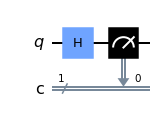

In [1]:
from qiskit import QuantumRegister, \
    ClassicalRegister, QuantumCircuit
import matplotlib
qReg = QuantumRegister(1, 'q')
cReg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qReg, cReg)
circuit.h(qReg[0])
circuit.measure(qReg[0], cReg[0])
display(circuit.draw('mpl'))

52345735-23fd-4f00-aaf2-422a794ad9d7
{'0': 489, '1': 511}


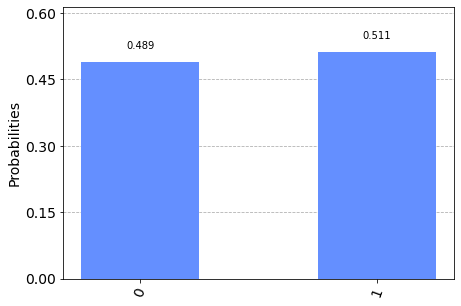

In [2]:
from qiskit import Aer
device = Aer.get_backend('qasm_simulator')
from qiskit import execute
from qiskit.visualization import plot_histogram

job = execute(circuit, backend=device, shots=1000)
print(job.job_id())

result = job.result()
counts = result.get_counts(circuit)

print(counts)
display(plot_histogram(counts))


In [3]:
from qiskit import IBMQ

IBMQ.save_account('d2f91bb3087e1a098ef97e898a960e54d3d530cf59dee7e09e558cbae70c53766bf862f5a97858df9a0e188b3f5c550d12c1345db93c2b5dabfb76fc2bbd1e8e', overwrite=True)
# top line saves account to disk
provider = IBMQ.load_account()
backends = provider.backends(operational=True, min_num_qubits=5)
for i in backends:
    print(i)

c:\Users\param\WorkSpace\quantum-computing\experimenting_qiskit\env\lib\site-packages\requests_ntlm\requests_ntlm.py:5: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography import x509


ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_sherbrooke
ibm_brisbane
ibm_kyoto
ibm_osaka


cooehh6phvvei9s9d0rg
test
{'1': 555, '0': 445}


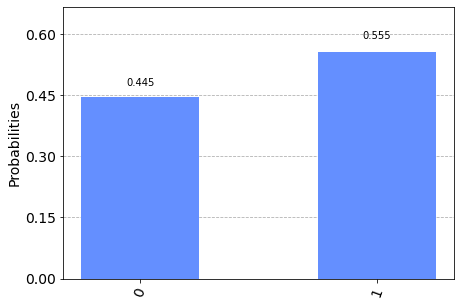

In [4]:
from qiskit import execute
from qiskit.visualization import plot_histogram

device = provider.get_backend('ibmq_qasm_simulator')

job = execute(circuit, backend=device, shots=1000)
print(job.job_id())

result = job.result()
print('test')
counts = result.get_counts(circuit)

print(counts)
display(plot_histogram(counts))

In [5]:
from qiskit import execute
from qiskit.visualization import plot_histogram

device = provider.get_backend('ibm_kyoto')

job = execute(circuit, backend=device, shots=10)
print(job.job_id())

result = job.result()
print('test')
counts = result.get_counts(circuit)

print(counts)
display(plot_histogram(counts))


IBMQBackendApiError: "Error submitting job: '400 Client Error: Bad Request for url: https://api.quantum.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/6630e8d3a1ce5f2abf838a76/jobDataUploaded. Error in runtime client calling method runJob: Error executing POST https://runtime-us-east.quantum-computing.ibm.com/jobs {No request body}, Error code: 2413.'"